<a href="https://colab.research.google.com/github/Hikachhu/ProgGPU/blob/main/TD3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyse des donnée

In [108]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
import time
import statistics
!pip install colorama
from colorama import Fore, Back, Style

simplefilter("ignore", category=ConvergenceWarning)

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

1) Charger la base de données digits disponible sous sklearn.

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

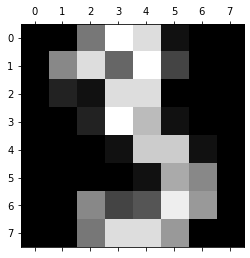

In [3]:
plt.gray()
plt.matshow(digits.images[3]) #index est le numéro de l’image
plt.show()

In [7]:
X = digits.data
y = digits.target

2) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) 
(model_selection.train_test_split).

In [155]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,test_size=0.3)

2. Apprentissage

In [12]:
def train_multi(C,early_stop=False):
  clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0,early_stopping=early_stop)
  clf2.fit(X_train,y_train)
  return clf2

final cost : 1.8411795481366304 / it = 60
final cost : 1.3519038024205872 / it = 78
final cost : 0.9470402156166977 / it = 100
final cost : 0.4241998681959674 / it = 100
final cost : 0.5042006610027971 / it = 85
final cost : 0.43386084198831887 / it = 100
final cost : 0.1340381286276732 / it = 100
final cost : 0.1665365075722411 / it = 100
final cost : 0.07991739967405813 / it = 100


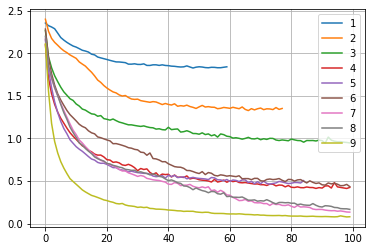

In [13]:
#Prend environ 6m21 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [14]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.21877486077963404	 test score=0.17037037037037037
i=2 train score=0.38424821002386633	 test score=0.34444444444444444
i=3 train score=0.5934765314240255	 test score=0.5537037037037037
i=4 train score=0.9061256961018298	 test score=0.8037037037037037
i=5 train score=0.8003182179793158	 test score=0.762962962962963
i=6 train score=0.8448687350835322	 test score=0.7462962962962963
i=7 train score=0.9657915672235481	 test score=0.8870370370370371
i=8 train score=0.9713603818615751	 test score=0.8759259259259259
i=9 train score=0.9912490055688147	 test score=0.9


3. Cross-validation


final cost : 1.8430158455034478 / it = 19
final cost : 1.3516508659486746 / it = 26
final cost : 1.4667333954212933 / it = 19
final cost : 0.7687519631985543 / it = 77
final cost : 0.8414709547897387 / it = 41
final cost : 1.0058499709879742 / it = 20
final cost : 0.6376637302315811 / it = 36
final cost : 0.3910752541255959 / it = 39
final cost : 0.21982811889373816 / it = 54


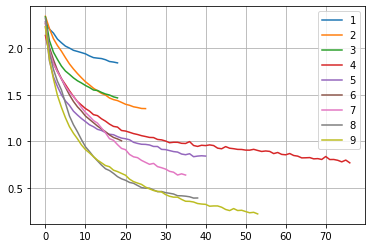

In [15]:
#Prend environ à 2m29 s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [16]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.2012728719172633	 test score=0.18518518518518517
i=2 train score=0.40652346857597454	 test score=0.3333333333333333
i=3 train score=0.3858392999204455	 test score=0.3388888888888889
i=4 train score=0.7271280827366746	 test score=0.6388888888888888
i=5 train score=0.6817820206841687	 test score=0.6537037037037037
i=6 train score=0.5656324582338902	 test score=0.5166666666666667
i=7 train score=0.8353221957040573	 test score=0.7574074074074074
i=8 train score=0.883054892601432	 test score=0.8074074074074075
i=9 train score=0.9474940334128878	 test score=0.9


final cost : 0.4950166858074963 / it = 42
final cost : 0.5705274231125572 / it = 37
final cost : 0.22912373436974437 / it = 62
final cost : 0.28126977425908356 / it = 97
final cost : 0.8638348086792226 / it = 25
final cost : 0.875387650545007 / it = 33
final cost : 0.42079153854440077 / it = 50
final cost : 0.6411412822832522 / it = 45
final cost : 0.4134096920049462 / it = 46
Train mean:0.8250685052594361 var:0.008623423766456249
Test mean:0.7847736625514403 var:0.008445189588308016


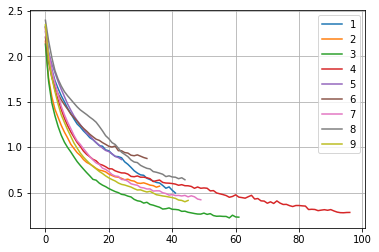

In [153]:
#Prend environ 3min35 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(7,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))
print("Train mean:{} var:{}".format(np.mean(clfScoreTrain),np.var(clfScoreTrain)))
print("Test mean:{} var:{}".format(np.mean(clfScoreTest),np.var(clfScoreTest)))

4.Rejet

In [18]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))
    return y_masked.filled(-1)
 
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))
    return y_masked.filled(-1)

In [39]:
masker=argmax_reject_threshold(clf.predict_proba(X_test),0.5)
unique, counts = np.unique(masker, return_counts=True)
print("{} {}".format(len(masker),dict(zip(unique, counts))[-1]))

540 74


In [169]:
longueurTotal=15
pos=0
tauxReussite=0.5
masker=argmax_reject_threshold(clf.predict_proba(X_test),tauxReussite)
prediction=clf.predict_proba(X_test)[0:longueurTotal]
truncadte=np.array(trunc(np.array(prediction), decs=3))
for i in truncadte:
  here=list(i)
  trie=sorted(here,reverse=True)
  duo=[]
  for a in trie:
    duo.append([here.index(a),a])
  if duo[0][1] < 0.5:
      print(Fore.RED+str(pos)+" "+str(duo[0:3])+Fore.RESET)
  else:
      print(str(pos)+" "+str(duo[0:3]))
  pos+=1

print("\n")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(y_test[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(y_test[i]),end=" ")
print("")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  elif(masker[i] != y_test[i]):
    print(Fore.BLUE+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(masker[i]),end=" ")
print("\n")
unique, counts = np.unique(masker, return_counts=True)
nbrOutput=len(masker)
nbrEchecCuissant=dict(zip(unique, counts))[-1]

print("Il y a en tout {} sorties dont {} avec une valeur max inférieur à {} ce qui fais un score de {}".format(nbrOutput,nbrEchecCuissant,tauxReussite,trunc(nbrEchecCuissant/nbrOutput,6)))

0 [[7, 0.826], [2, 0.057], [0, 0.044]]
1 [[9, 0.646], [8, 0.113], [5, 0.095]]
2 [[1, 0.47], [8, 0.401], [2, 0.047]]
3 [[2, 0.763], [7, 0.062], [1, 0.045]]
4 [[3, 0.812], [9, 0.12], [2, 0.025]]
5 [[9, 0.571], [8, 0.143], [5, 0.094]]
6 [[9, 0.543], [3, 0.351], [2, 0.063]]
7 [[2, 0.763], [7, 0.062], [1, 0.045]]
8 [[3, 0.78], [9, 0.149], [2, 0.027]]
9 [[2, 0.763], [7, 0.062], [1, 0.045]]
10 [[4, 0.939], [6, 0.024], [7, 0.011]]
11 [[1, 0.47], [8, 0.401], [2, 0.048]]
12 [[2, 0.763], [7, 0.062], [1, 0.045]]
13 [[7, 0.826], [2, 0.057], [0, 0.044]]
14 [[7, 0.827], [2, 0.057], [0, 0.044]]


07 09 01 02 03 03 09 02 03 02 04 01 02 07 07 
07 09 -1 02 03 09 09 02 03 02 04 -1 02 07 07 

Il y a en tout 540 sorties dont 139 avec une valeur max inférieur à 0.5 ce qui fais un score de 0.257407
